In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [13]:
from google.colab import files


uploaded = files.upload()

Saving glass.csv to glass (1).csv


In [14]:
df= pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [17]:
cols = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
target = ["Type"]

**EDA and Data Preprocessing**

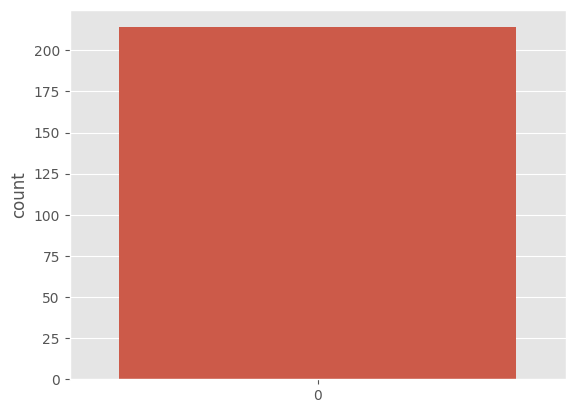

In [20]:
sns.countplot(df["Type"])
plt.show()

<ipython-input-19-895ab8450eb8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))


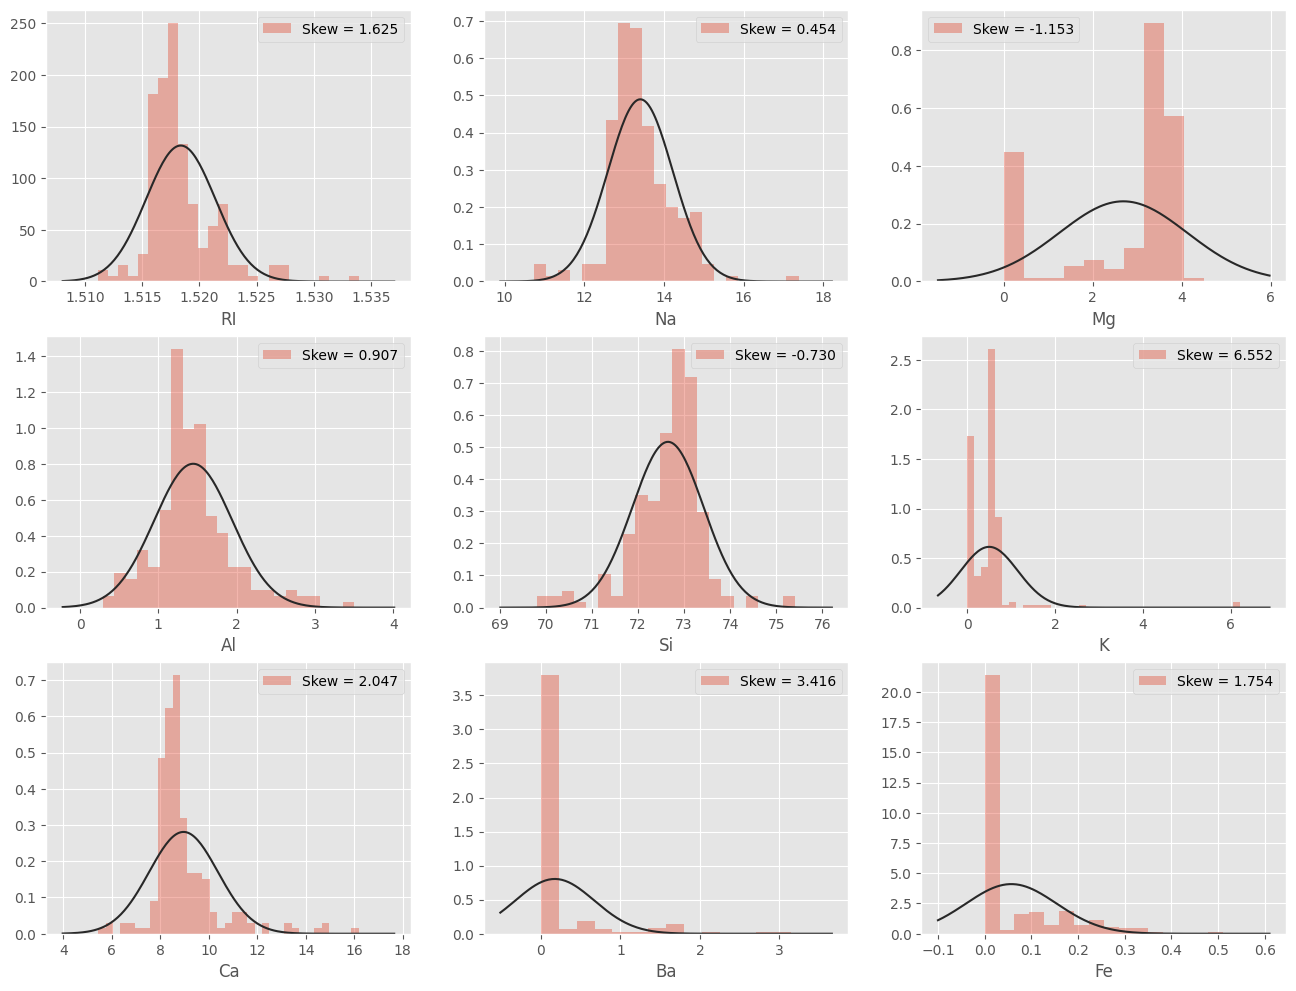

In [19]:
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

**Uni Variate Box Plot**

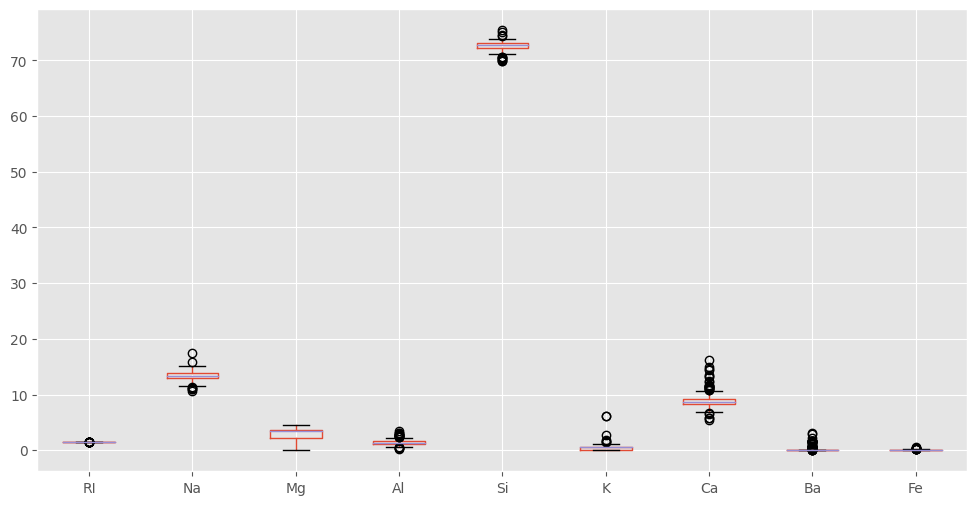

In [21]:
df.iloc[:,:-1].boxplot(figsize=(12,6))
plt.show()

**Inference**
* The main component of Glass is Silicon having more than 70% of composition.
* Silicon, Sodium and Calcium combines to make 90% composition.
* The least important component is Iron

**Scatter Matrix**

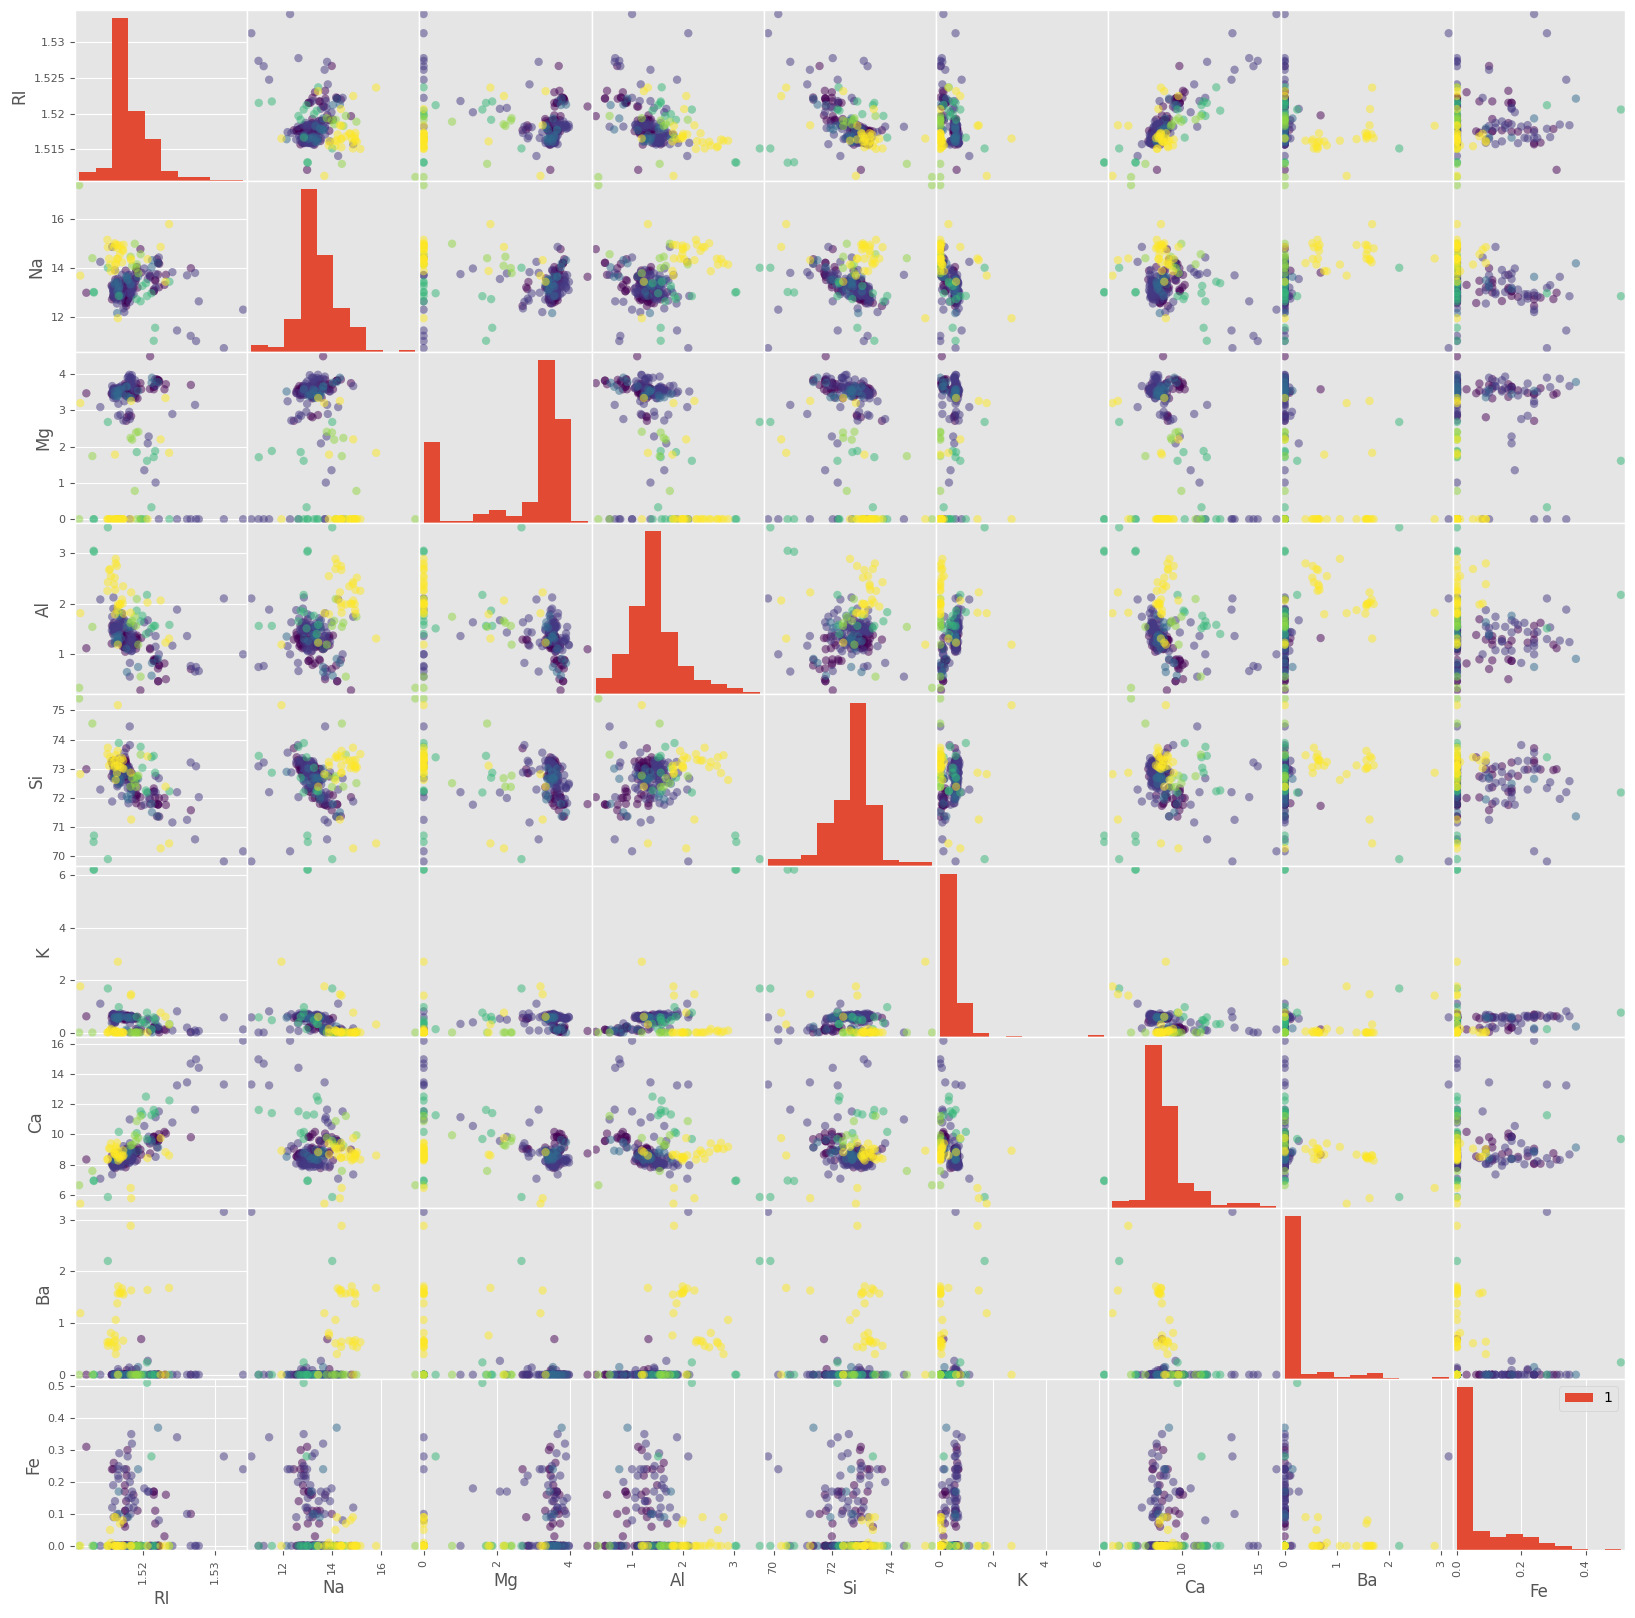

In [29]:
pd.plotting.scatter_matrix(df.iloc[:,:-1], c=df.iloc[:,-1], figsize=(20, 20), marker='o')
plt.legend(df["Type"].unique())
plt.show()

**Pair Plot**

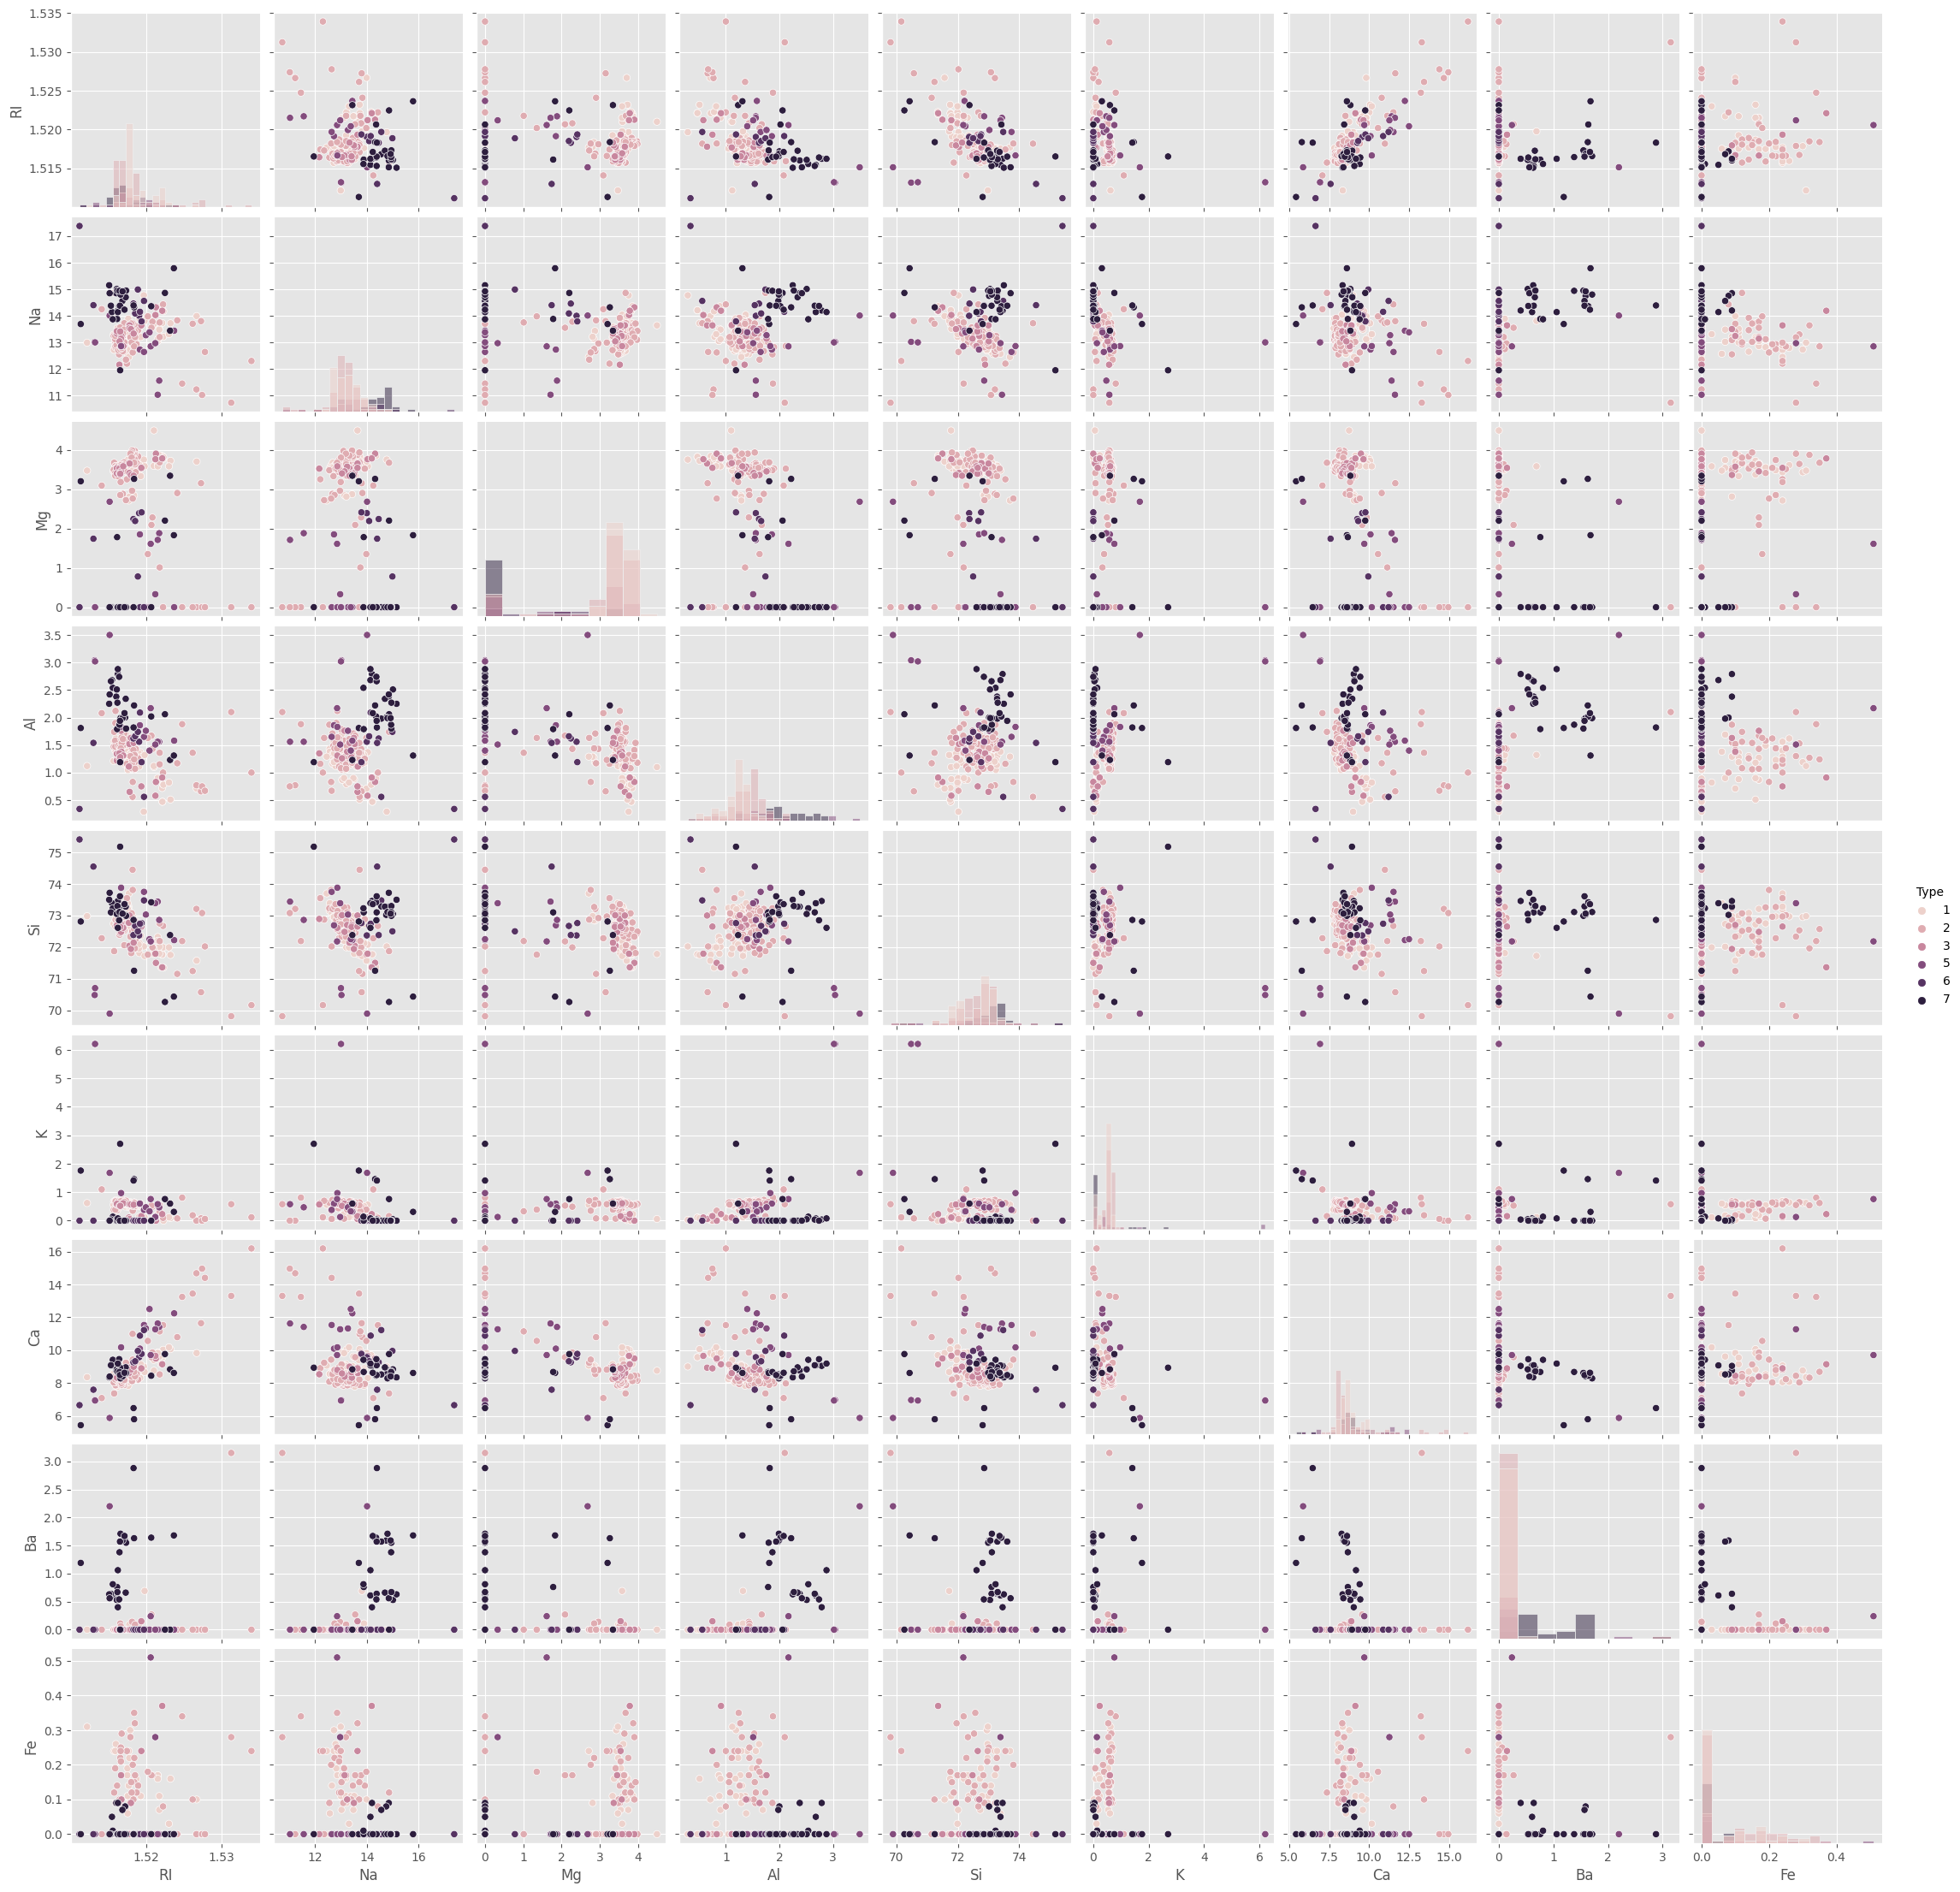

In [30]:
sns.pairplot(df, hue='Type', diag_kind ='hist')
plt.show()

**Correlation Plot**

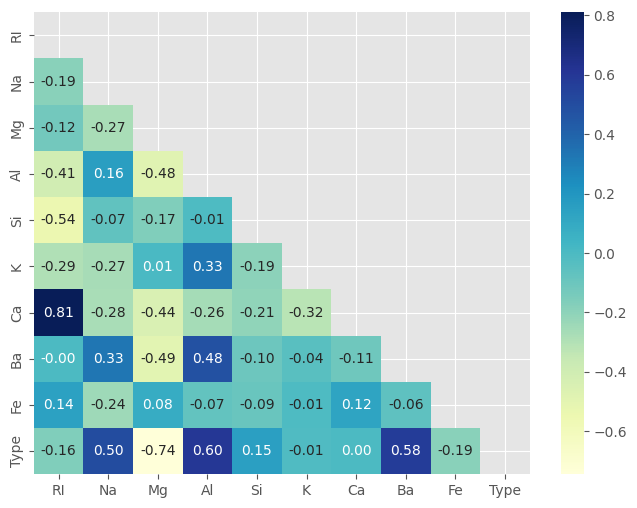

In [32]:
plt.figure(figsize=(8,6 ))
corr= df.corr()
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr, annot= True, fmt = '.2f', cmap= 'YlGnBu', mask= mask)
plt.show()

**Inference**
* K and Ca have no correlation with Type

**Feature Engineering- Based on the Mean of K and Ca in Classes**

In [33]:
df.groupby('Type')['Ca'].mean()

Type
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

In [34]:
df.groupby('Type')['K'].mean()

Type
1    0.447429
2    0.521053
3    0.406471
5    1.470000
6    0.000000
7    0.325172
Name: K, dtype: float64

In [36]:
df['Ca_morethan9']= np.where(df['Ca']>9,1,0)
df["K_morethandot7"] = np.where(df['K']>0.7,1,0)
df['K_lessthandot4'] = np.where(df['K']<0.4,1,0)

In [37]:
cols.append('Ca_morethan9')
cols.append('K_morethandot7')
cols.append('K_lessthandot4')

**Statistical Check for Variable**

In [39]:
import statsmodels.api as sm
import statsmodels.stats as sms

In [40]:
for col in cols:
  data= sm.formula.ols(col+'~Type', data= df).fit()
  pval= sms.anova.anova_lm(data)['PR(>F)'][0]
  print(f'Pval for col{col}:{pval}')

Pval for colRI:0.01617845580599427
Pval for colNa:4.061873356970947e-15
Pval for colMg:3.8829946163472014e-39
Pval for colAl:3.26080946946565e-22
Pval for colSi:0.026619910104707312
Pval for colK:0.8837426923094087
Pval for colCa:0.9889510387030452
Pval for colBa:3.038430172779663e-20
Pval for colFe:0.005729300351381718
Pval for colCa_morethan9:0.07403949750207843
Pval for colK_morethandot7:0.0001065753630029827
Pval for colK_lessthandot4:2.377474211882503e-09


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

**Splitting the Data**

In [42]:
X= df.drop('Type', axis= 1)
y= df['Type']

scaler = RobustScaler()
X= scaler.fit_transform(X)
X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [43]:
X

array([[ 1.26375712,  0.37057221,  0.68013468, ...,  0.        ,
         0.        ,  1.        ],
       [-0.02656546,  0.64305177,  0.08080808, ...,  0.        ,
         0.        ,  0.        ],
       [-0.56925996,  0.2506812 ,  0.04713805, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.12713472,  1.15531335, -2.34343434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44402277,  1.17711172, -2.34343434, ...,  0.        ,
         0.        ,  1.        ],
       [-0.21631879,  1.01362398, -2.34343434, ...,  0.        ,
         0.        ,  1.        ]])

In [44]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

**Model Building and Analysis**

**Logistic Regression**

Accuracy score of Logistic Regression: 0.5348837209302325


<ipython-input-49-014253362811>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred1, color= 'blue')


<Axes: xlabel='Type', ylabel='Density'>

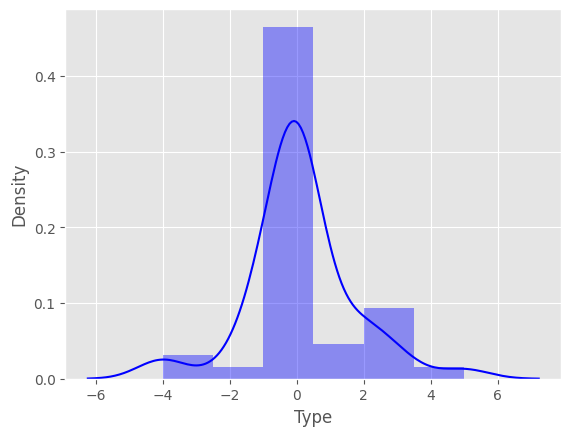

In [49]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)
y_pred1= logreg.predict(X_test)
score_logreg = accuracy_score(ypred1, y_test)

print('Accuracy score of Logistic Regression:', score_logreg)
sns.distplot(y_test-y_pred1, color= 'blue')

**Random Forest Classifier**

Accuracy Score of Random Forest Classifier: 0.8372093023255814


<ipython-input-50-bb1d347bfccc>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred2, color='blue')


<Axes: xlabel='Type', ylabel='Density'>

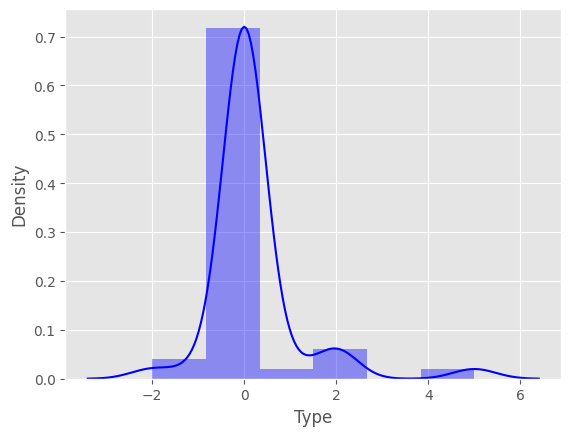

In [50]:
rf= RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred2= rf.predict(X_test)
score_rf= accuracy_score(y_pred2,y_test)

print('Accuracy Score of Random Forest Classifier:', score_rf)
sns.distplot(y_test-y_pred2, color='blue')

**Gradient Boost**

Accuracy score of Gradient Boost Classifer: 0.6976744186046512


<ipython-input-53-f77c026e915b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred3, color= 'blue')


<Axes: xlabel='Type', ylabel='Density'>

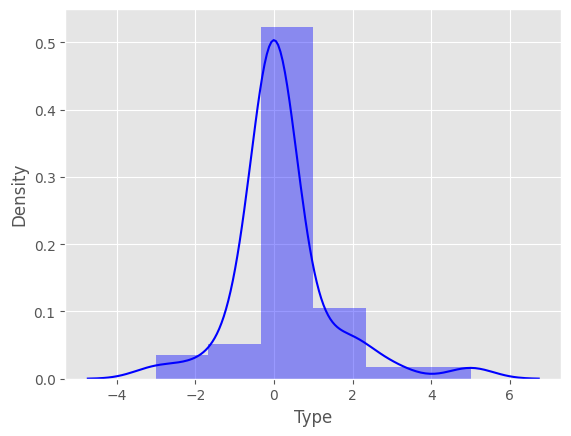

In [53]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred3 = gbc.predict(X_test)
score_gbc = accuracy_score(y_pred3,y_test)

print('Accuracy score of Gradient Boost Classifer:',score_gbc)
sns.distplot(y_test-y_pred3, color= 'blue')

**Decision tree Classifier**

Accuracy score of Decision Tree: 0.6046511627906976


<ipython-input-54-de78e5de9713>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred4, color ='blue')


<Axes: xlabel='Type', ylabel='Density'>

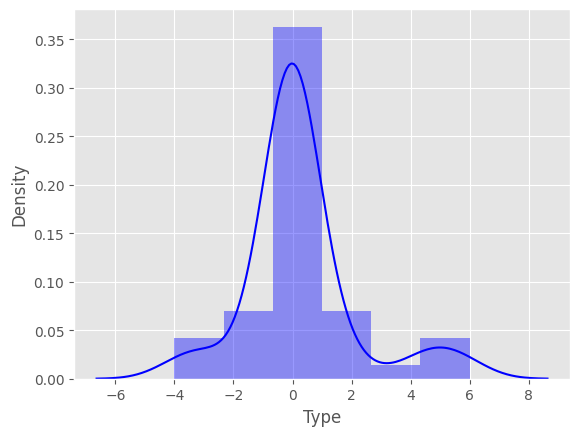

In [54]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4= dt.predict(X_test)
score_dt= accuracy_score(y_pred4, y_test)

print('Accuracy score of Decision Tree:', score_dt)
sns.distplot(y_test-y_pred4, color ='blue')

**Using KNN**

Accuracy of K Nearest Neighbors Classsifier: 0.6976744186046512


<ipython-input-56-bb3610816651>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred5, color='green')


<Axes: xlabel='Type', ylabel='Density'>

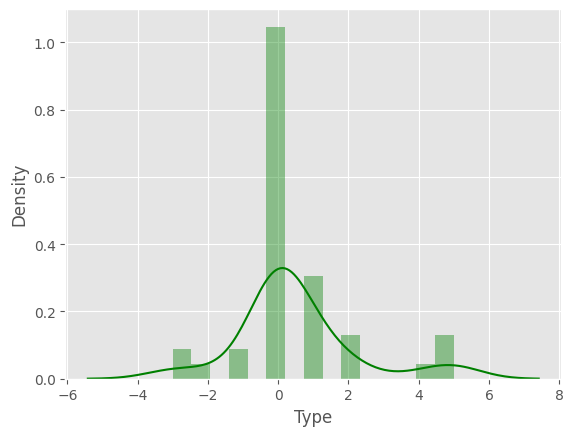

In [56]:
, KNeighborsTransformer
accuracy =[]
for i in range (1,11):
  model= KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred5= model.predict(X_test)
  accuracy.append(model.score(X_test,y_test))
score_knn= max(accuracy)
print('Accuracy of K Nearest Neighbors Classsifier:', score_knn)
sns.distplot(y_test-y_pred5, color='green')

**Support vector Classifier**

Accuracy Score of SVM classifier: 0.6511627906976745


<ipython-input-58-fe15c94c26d0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred6, color= 'orange')


<Axes: xlabel='Type', ylabel='Density'>

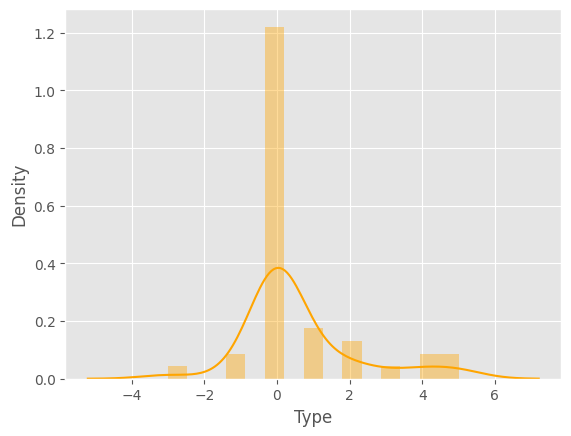

In [58]:
svm= SVC()
svm.fit(X_train,y_train)
y_pred6= svm.predict(X_test)
score_svm= accuracy_score(y_pred6, y_test)
print('Accuracy Score of SVM classifier:', score_svm)
sns.distplot(y_test-y_pred6, color= 'orange')

In [61]:
pd.DataFrame({'Model': ['LogisticRegression','RandomForest','Gradient Booosting', 'Decision Tree','K Nearest Neighbors','Support Vector Classifier'],
              'Score': [score_logreg, score_rf, score_gbc,score_dt, score_knn, score_svm]})

,Model,Score
0,LogisticRegression,0.534884
1,RandomForest,0.837209
2,Gradient Booosting,0.697674
3,Decision Tree,0.604651
4,K Nearest Neighbors,0.697674
5,Support Vector Classifier,0.651163


**From the above data, we can see that Random Forest classifier gives the best result with a score of 83.72%. Hence we will use this model**